In [1]:

#%pip install rasterio matplotlib
# Import necessary libraries

import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = rasterio.open("data/KazEastFused.tif")
# Read the image data

# Read all bands into a (bands, height, width) numpy array
image = dataset.read()  # Shape: (4, height, width)
print("Image shape:", image.shape)

Image shape: (4, 28173, 11339)


In [6]:
def normalize_image_bands(image_array):
    normalized_image = image_array.astype(np.float32)
    for band_index in range(normalized_image.shape[0]):
        band = normalized_image[band_index]
        min_value = np.min(band)
        max_value = np.max(band)
        if max_value > min_value:  # Avoid division by zero
            normalized_image[band_index] = (band - min_value) / (max_value - min_value)
        else:
            normalized_image[band_index] = 0  # or some fallback
    return normalized_image

normalized_image = normalize_image_bands(image)

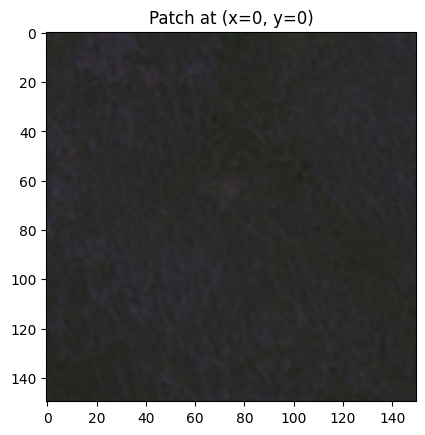

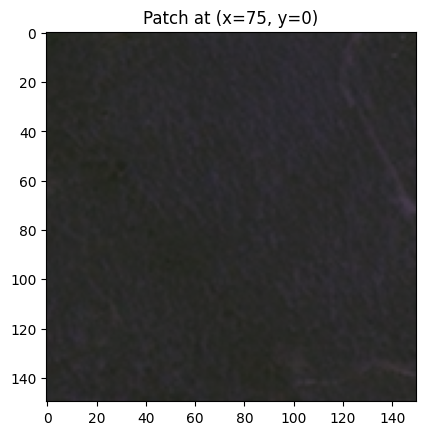

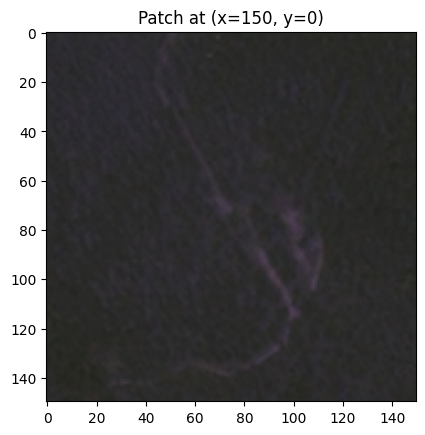

In [7]:
# Sliding window generator to extract patches from the image
def sliding_window_generator(image_array, window_size, stride):
    """
    Yield patches of shape (channels, height, width) from a 3D image tensor.
    """
    channels, height, width = image_array.shape
    window_height, window_width = window_size

    for y_start in range(0, height - window_height + 1, stride):
        for x_start in range(0, width - window_width + 1, stride):
            patch = image_array[:, y_start:y_start + window_height, x_start:x_start + window_width]
            yield patch, (x_start, y_start)


# Example usage of the sliding window generator
patch_window_size = (150, 150)  # Size of the patches
patch_stride = 75  # Stride for the sliding window

patches = list(sliding_window_generator(normalized_image, patch_window_size, patch_stride))

for index in range(3):
    patch, (x_offset, y_offset) = patches[index]
    rgb_patch = patch[[2, 1, 0]]  # Red, Green, Blue bands
    rgb_patch = np.transpose(rgb_patch, (1, 2, 0))  # Change to (height, width, channels)
    plt.imshow(rgb_patch)
    plt.title(f"Patch at (x={x_offset}, y={y_offset})")
    plt.show()